##***Comparison of classifiers***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from datetime import datetime
import seaborn as sns

In [ ]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('test.csv')

##PART 1

Data exploration and visualization

In [ ]:
display(train_df)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
train_df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

Observation:

All datatypes are not int or float, most of the data is categorical

**Data Inspection**

In [ ]:
for col in train_df.columns.values: #for each column
  list_vals = pd.unique(train_df[col])   # create a list of unique values
  print(col + ' is of type ' + str(train_df[col].dtypes) +', has ' + str(len(list_vals)) + 'unique values' )
  if len(list_vals) < 10: # If list has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print(' These are:' + list_str[0:len(list_str)-2])

id is of type int64, has 44550unique values
amount_tsh is of type float64, has 85unique values
date_recorded is of type object, has 346unique values
funder is of type object, has 1652unique values
gps_height is of type int64, has 2396unique values
installer is of type object, has 1855unique values
longitude is of type float64, has 43155unique values
latitude is of type float64, has 43155unique values
wpt_name is of type object, has 28991unique values
num_private is of type int64, has 59unique values
basin is of type object, has 9unique values
 These are:Pangani,Lake Nyasa,Rufiji,Lake Tanganyika,Lake Victoria,Wami / Ruvu,Internal,Ruvuma / Southern Coast,Lake Rukw
subvillage is of type object, has 16618unique values
region is of type object, has 21unique values
region_code is of type int64, has 27unique values
district_code is of type int64, has 20unique values
lga is of type object, has 125unique values
ward is of type object, has 2080unique values
population is of type int64, has 956un

In [ ]:
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2793
gps_height                   0
installer                 2807
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 287
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

These missing values need to be handled.

In [ ]:
train_df.columns.values

array(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'], dtype=object)

In [ ]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,37192.623681,307.623224,665.490774,34.084084,-5.721980e+00,0.521549,15.338563,5.678967,179.112750,1295.782155
std,21399.827198,2402.742799,693.653179,6.555924,2.948828e+00,13.835868,17.672144,9.724205,478.995645,953.183961
min,1.000000,0.000000,-90.000000,0.000000,-1.164838e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18723.250000,0.000000,0.000000,33.105585,-8.574241e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37183.500000,0.000000,363.000000,34.905600,-5.045611e+00,0.000000,12.000000,3.000000,25.000000,1985.000000
75%,55647.500000,20.000000,1318.000000,37.176859,-3.327795e+00,0.000000,17.000000,5.000000,210.000000,2004.000000
max,74247.000000,170000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


There are a lot of features with similar representation of data such as 

extraction_type, extraction_type_group, extraction_type_class, 

payment, payment_type,

waterpoint_type, waterpoint_type_group etc.

so dropping these type of redundant data as they are not adding any additional value to the data.

Those features which are highly correlated are dropped and those having less no. of unique values.

Id, wpt_name can be dropped as they are unique and it won't effect the classification, num_private has almost all the values as zero so it can also be dropped.



#Part 2

Variable transformation, feature engineering, feature selection or elimination

In [ ]:
## Dropping the correlated data
train_df = train_df.drop(['id','wpt_name','num_private','region','region_code','recorded_by','district_code','lga','ward','quantity_group','quality_group','source', 'extraction_type_group', 'management', 'payment', 'installer', 'scheme_management', 'scheme_name', 'subvillage'], axis=1)

Checking the null values.

In [ ]:
train_df.isnull().sum()

amount_tsh                  0
date_recorded               0
funder                   2793
gps_height                  0
longitude                   0
latitude                    0
basin                       0
population                  0
public_meeting           2491
permit                   2336
construction_year           0
extraction_type             0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
dtype: int64

The null data entries are to be replaced by a suitable quantity or value.

These are the target variables.

functional          

non functional     
        
functional needs repair

In [ ]:
train_df.status_group.value_counts()

functional                 24194
non functional             17118
functional needs repair     3238
Name: status_group, dtype: int64

In [ ]:
# To convert string to numeric value
new_values = {'functional':2, 'functional needs repair':1, 'non functional':0}
train_df['status_values']  = train_df.status_group.replace(new_values)

In [ ]:
train_df['funder'].head(10)

0                   Germany Republi
1                              Cdtf
2            Government Of Tanzania
3                  District Council
4                  District Council
5    Rural Water Supply And Sanitat
6            Government Of Tanzania
7                  District Council
8                               Dwe
9                              Dwsp
Name: funder, dtype: object

In [ ]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def funder_new(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
train_df['funder'] = train_df.apply(lambda row: funder_new(row), axis=1)

In [ ]:
piv_table = pd.pivot_table(train_df,index=['funder','status_group'],values='status_values', aggfunc='count')
piv_table

status_values
funder     status_group                          
danida     functional                        1282
           functional needs repair            119
           non functional                     961
gov        functional                        2781
           functional needs repair            519
           non functional                    3480
hesawa     functional                         692
           functional needs repair            180
           non functional                     767
other      functional                       18431
           functional needs repair           2267
           non functional                   11077
rwssp      functional                         609
           functional needs repair             80
           non functional                     343
world_bank functional                         399
           functional needs repair             73
           non functional                     490

In [ ]:
train_df.public_meeting.value_counts()

True     38212
False     3847
Name: public_meeting, dtype: int64

In [ ]:
##There are only two values in this column so, we can keep it and fill the null values to UNKNOWN
train_df.public_meeting = train_df.public_meeting.fillna('Unknown')



In [ ]:
train_df.permit.value_counts()

True     29057
False    13157
Name: permit, dtype: int64

In [ ]:
##There are only two values in this column so, we can keep it and fill the null values to UNKNOWN
train_df.permit = train_df.permit.fillna('Unknown')

In [ ]:
train_df.isnull().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
status_values            0
dtype: int64

In [ ]:
##lets check the data types again.
cols = train_df.select_dtypes(include = ['object'])
cols.apply(lambda x: len(x.unique()))

date_recorded            346
funder                     6
basin                      9
public_meeting             3
permit                     3
extraction_type           18
extraction_type_class      7
management_group           5
payment_type               7
water_quality              8
quantity                   5
source_type                7
source_class               3
waterpoint_type            7
waterpoint_type_group      6
status_group               3
dtype: int64

Converting all the Date and time related columns to Date_time objects

In [ ]:
## changing the construction year to numeric value

train_df.construction_year = pd.to_numeric(train_df.construction_year)
train_df.construction_year.value_counts()
## There are 20709 instances with out a year so let us fill the values with median of the column

train_df['construction_year'].median()

1985.0

In [ ]:
train_df.loc[train_df.construction_year <= 0, train_df.columns=='construction_year'] = 1986

In [ ]:
# Let's first convert the column to type datetime. Then change the column to represent the 
# number of days since the most recently recorded datum we have. The idea being that more 
# recently recorded pumps might be more likely to be functional than non-functional. 

train_df.date_recorded = pd.to_datetime(train_df.date_recorded)
train_df.date_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                   44550
unique                    346
top       2011-03-15 00:00:00
freq                      423
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [ ]:
# The most recent data is 2013-12-03. Subtract each date from this point to obtain a 
# 'days_since_recorded' column.

train_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train_df.date_recorded)
train_df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_df.columns]
train_df.days_since_recorded = train_df.days_since_recorded.astype('timedelta64[D]').astype(int)
train_df.days_since_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


count    44550.000000
mean       615.289809
std        333.898570
min          0.000000
25%        297.000000
50%        420.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [ ]:

#converting the datatimeinto categorical as in :  '60s', '70s', '80s', '90s, '00s', '10s', 'unknown'.

def construction_new(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train_df['construction_year'] = train_df.apply(lambda row: construction_new(row), axis=1)

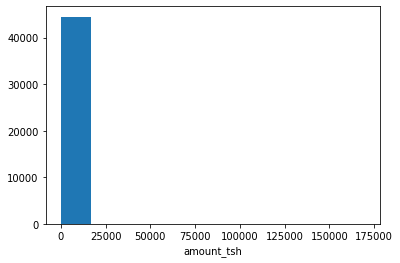

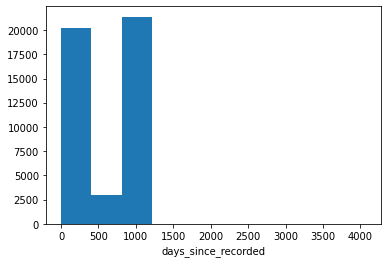

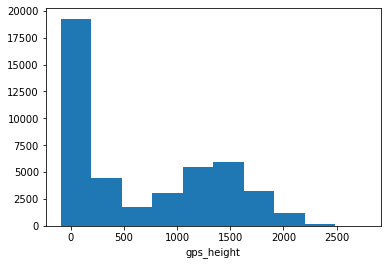

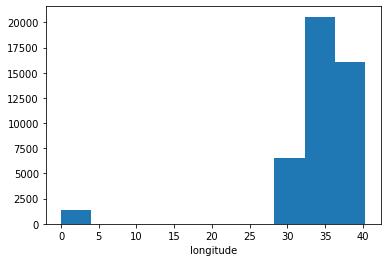

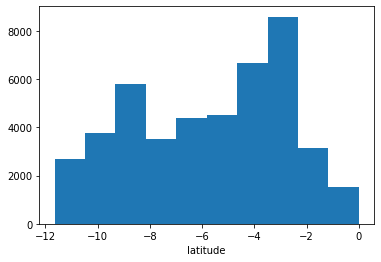

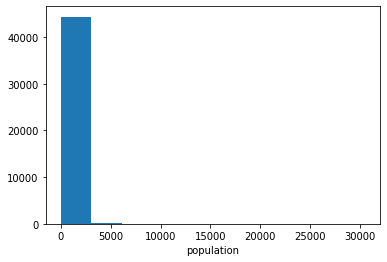

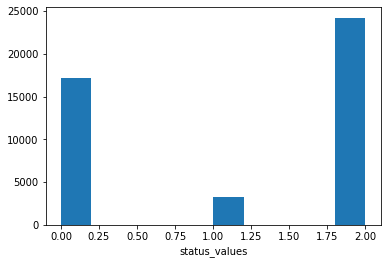

In [ ]:
#plot histogram for continuous variables

for col in train_df.columns.values:
  if (train_df[col].dtypes == 'int64') | (train_df[col].dtypes == 'float64'):
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.show()


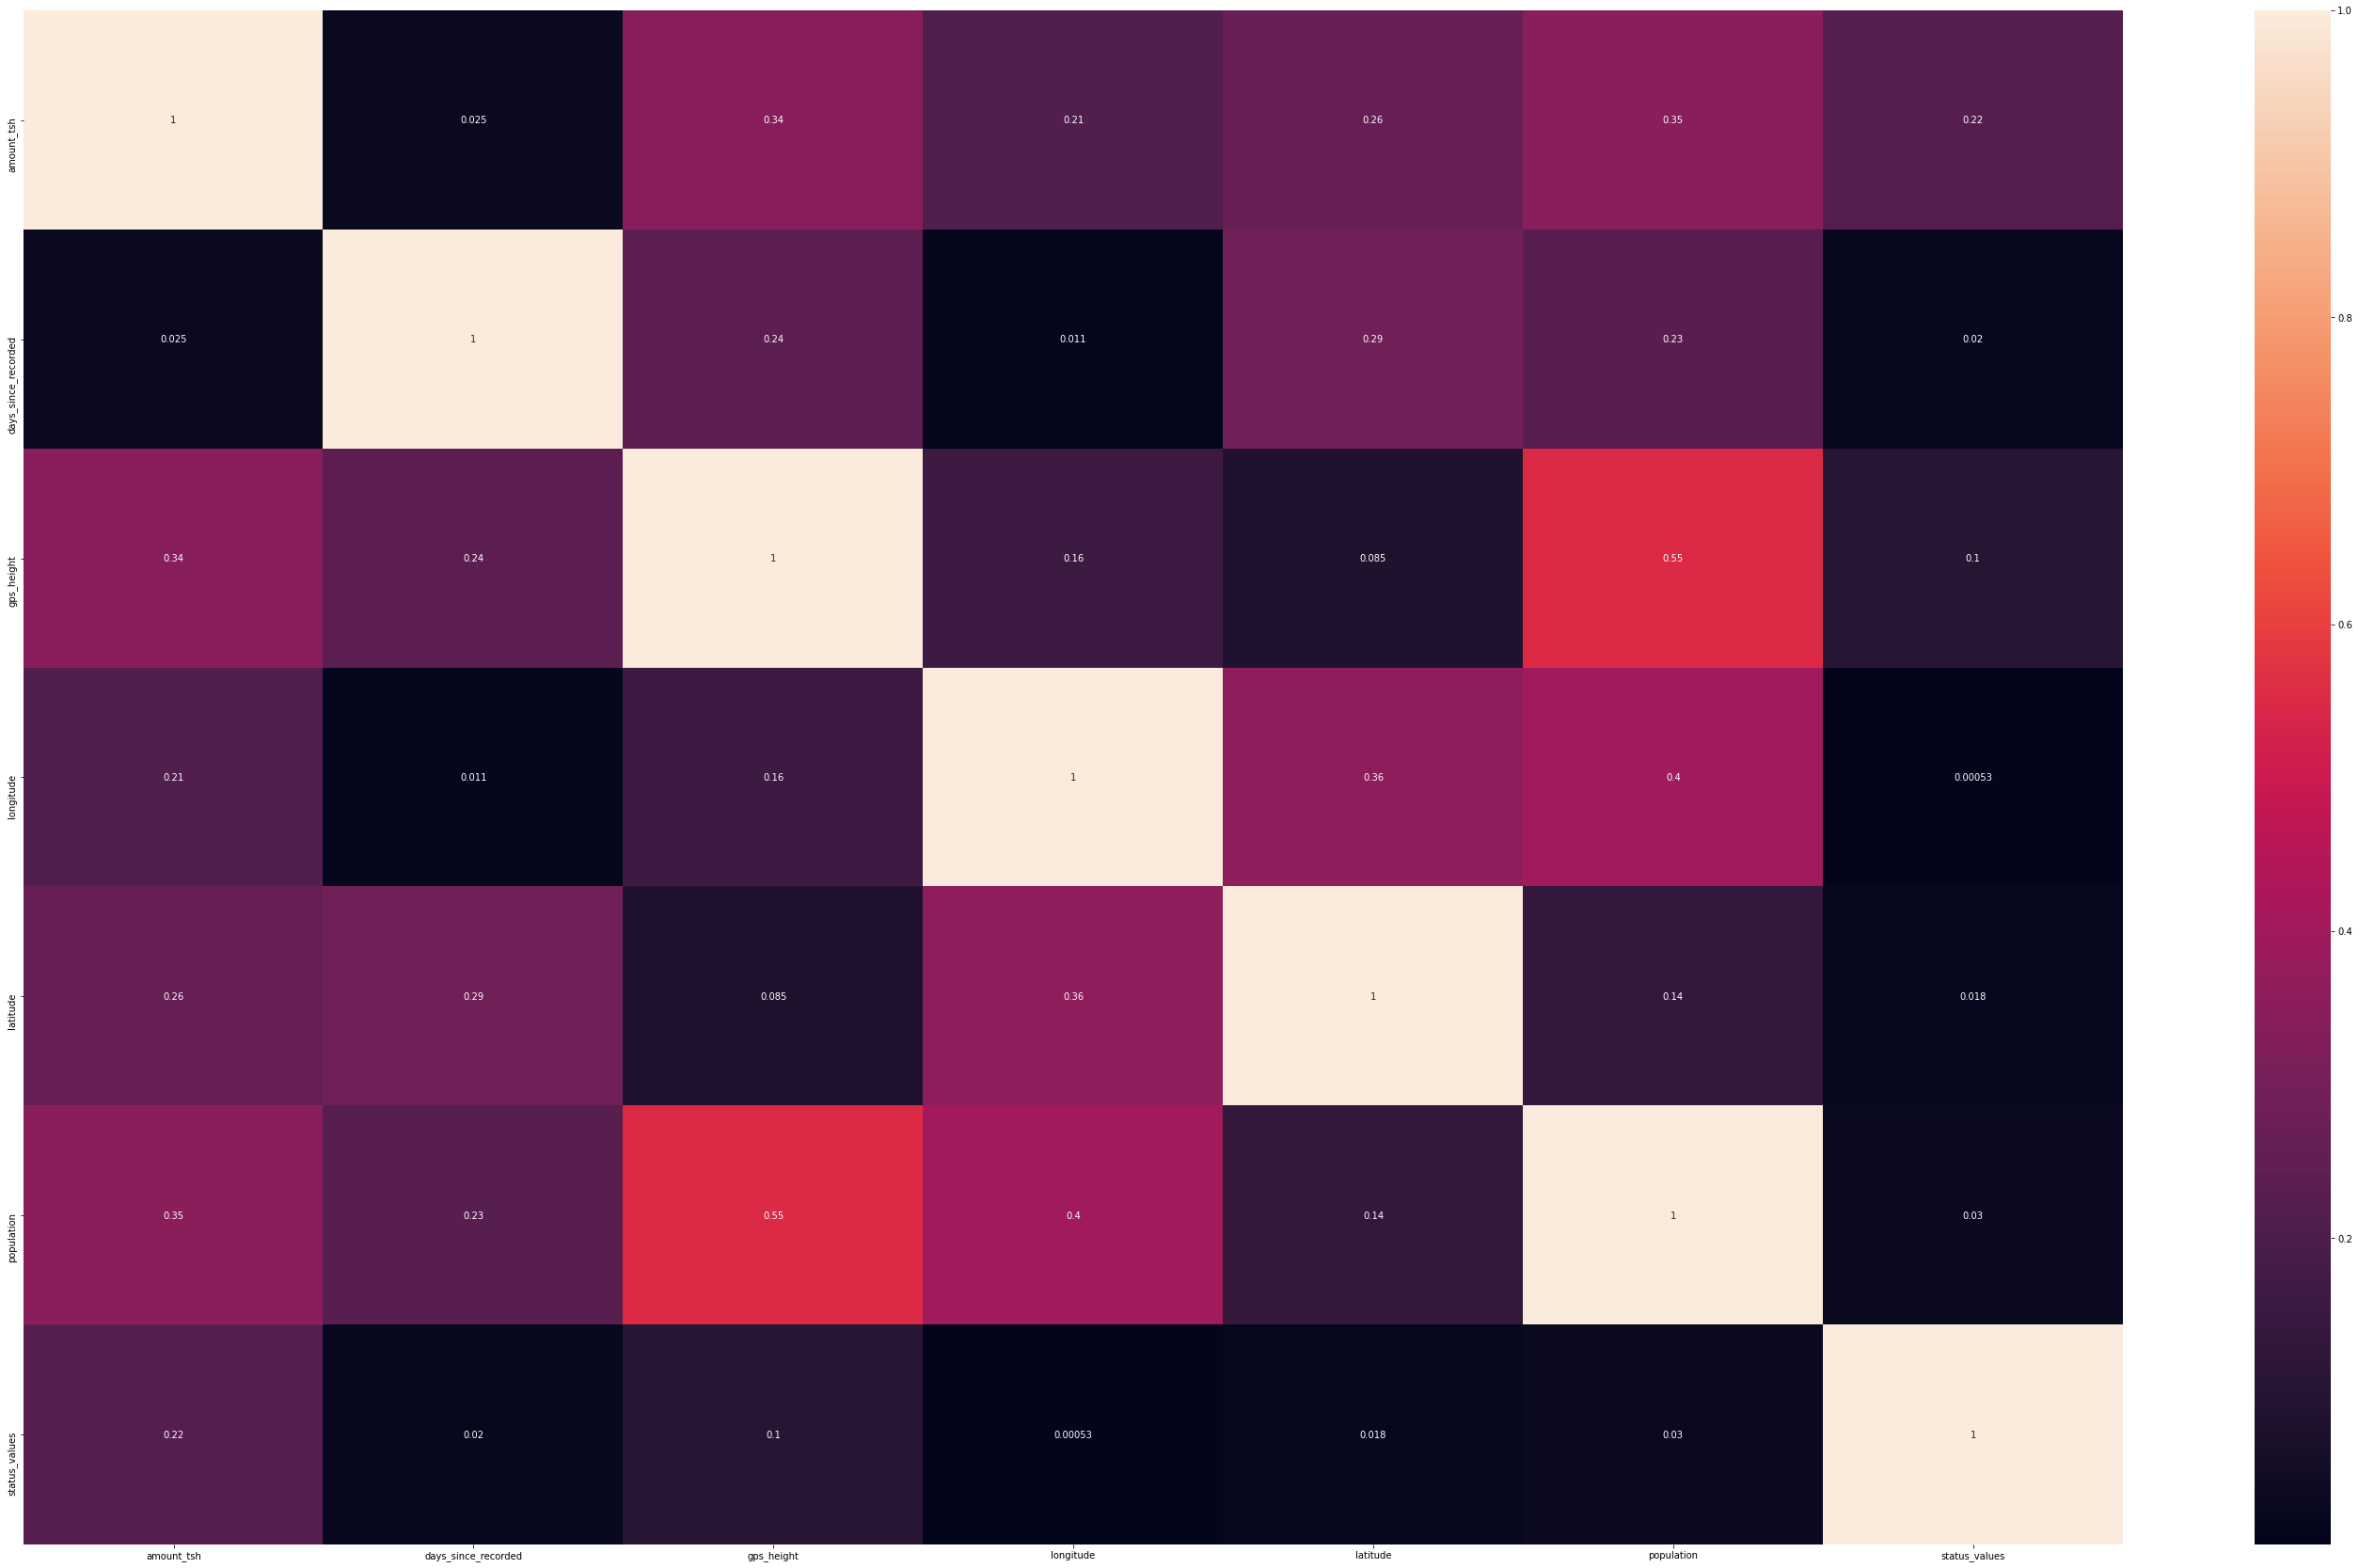

In [ ]:
corMatrix = train_df.corr(method = 'spearman') # for non linear
fig, ax = plt.subplots(figsize=(50,30))
sns.heatmap(abs(corMatrix), annot = True)
plt.show()

There is no significant correlation among the features as observed by the heatmap.

In [ ]:
train_df.status_group.value_counts()/len(train_df.status_group)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

It shows that there is $54.31 $ % chance of a pump to be functional if a pump is selected.

In [ ]:
## Matching Training and testing data frames
## Dropping the correlated data
test_df = test_df.drop(['id','wpt_name','num_private','region','region_code','recorded_by','district_code','lga','ward','quantity_group','quality_group','source', 'extraction_type_group', 'management', 'payment', 'installer', 'scheme_management', 'scheme_name', 'subvillage'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


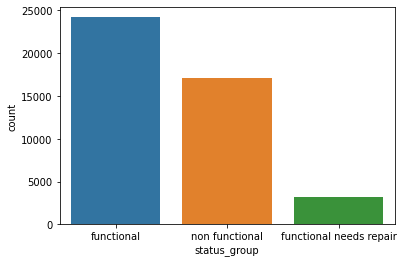

In [ ]:
sns.countplot(train_df['status_group'])

In [ ]:
##cleaning the columns as the training data set
test_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test_df.date_recorded)
test_df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test_df.columns]
test_df.days_since_recorded = test_df.days_since_recorded.astype('timedelta64[D]').astype(int)

test_df.permit = test_df.permit.fillna('Unknown')
test_df.public_meeting = test_df.public_meeting.fillna('Unknown')

test_df['construction_year'] = test_df.apply(lambda row: construction_new(row), axis=1)
test_df['funder'] = test_df.apply(lambda row: funder_new(row), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
train_new = train_df.copy()
train_df = train_df.drop(['status_values','status_group'], axis = 1)

In [ ]:
test_df = test_df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
test_df.head()

,amount_tsh,days_since_recorded,funder,gps_height,longitude,latitude,basin,population,public_meeting,permit,construction_year,extraction_type,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,1012,other,1676,35.247289,-8.113243,Rufiji,769,True,True,00s,gravity,gravity,user-group,never pay,soft,dry,spring,groundwater,communal standpipe,communal standpipe
1,0.0,961,other,0,36.163435,-5.218454,Wami / Ruvu,0,True,False,unknown,mono,motorpump,user-group,never pay,soft,enough,borehole,groundwater,communal standpipe,communal standpipe
2,0.0,982,other,0,36.363337,-7.297600,Rufiji,0,True,True,unknown,nira/tanira,handpump,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
3,0.0,873,other,0,31.496315,-2.167140,Lake Victoria,0,True,True,unknown,other,other,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
4,0.0,856,other,0,31.843905,-1.244841,Lake Victoria,0,True,True,unknown,gravity,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
display(train_df)

,amount_tsh,days_since_recorded,funder,gps_height,longitude,latitude,basin,population,public_meeting,permit,construction_year,extraction_type,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,waterpoint_type_group
0,7.0,258,other,1203,37.228664,-3.256505,Pangani,90,True,True,00s,gravity,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe,communal standpipe
1,0.0,1016,other,1409,34.615481,-9.972601,Lake Nyasa,70,False,False,80s,gravity,gravity,commercial,never pay,soft,enough,spring,groundwater,communal standpipe,communal standpipe
2,0.0,333,gov,1572,36.658778,-3.321529,Pangani,150,True,True,00s,gravity,gravity,user-group,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe
3,0.0,975,other,0,33.628025,-8.860795,Rufiji,0,True,True,80s,gravity,gravity,user-group,annually,soft,insufficient,river/lake,surface,communal standpipe,communal standpipe
4,300.0,270,other,1283,37.655509,-3.669777,Pangani,34,True,False,00s,gravity,gravity,user-group,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.0,314,other,0,32.383715,-3.457624,Lake Tanganyika,0,True,True,80s,nira/tanira,handpump,user-group,unknown,milky,enough,shallow well,groundwater,hand pump,hand pump
44546,0.0,862,other,0,31.615509,-2.738682,Lake Victoria,0,True,True,80s,afridev,handpump,user-group,monthly,soft,enough,borehole,groundwater,hand pump,hand pump
44547,0.0,283,gov,969,35.134412,-10.676062,Ruvuma / Southern Coast,60,Unknown,Unknown,70s,gravity,gravity,user-group,unknown,soft,seasonal,spring,groundwater,communal standpipe,communal standpipe
44548,200.0,252,other,1269,37.886287,-4.390882,Pangani,80,True,True,10s,gravity,gravity,user-group,monthly,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
train_df.dtypes

amount_tsh               float64
days_since_recorded        int64
funder                    object
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
population                 int64
public_meeting            object
permit                    object
construction_year         object
extraction_type           object
extraction_type_class     object
management_group          object
payment_type              object
water_quality             object
quantity                  object
source_type               object
source_class              object
waterpoint_type           object
waterpoint_type_group     object
dtype: object

In [ ]:
display(test_df)

,amount_tsh,days_since_recorded,funder,gps_height,longitude,latitude,basin,population,public_meeting,permit,construction_year,extraction_type,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,1012,other,1676,35.247289,-8.113243,Rufiji,769,True,True,00s,gravity,gravity,user-group,never pay,soft,dry,spring,groundwater,communal standpipe,communal standpipe
1,0.0,961,other,0,36.163435,-5.218454,Wami / Ruvu,0,True,False,unknown,mono,motorpump,user-group,never pay,soft,enough,borehole,groundwater,communal standpipe,communal standpipe
2,0.0,982,other,0,36.363337,-7.297600,Rufiji,0,True,True,unknown,nira/tanira,handpump,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
3,0.0,873,other,0,31.496315,-2.167140,Lake Victoria,0,True,True,unknown,other,other,user-group,never pay,soft,enough,shallow well,groundwater,hand pump,hand pump
4,0.0,856,other,0,31.843905,-1.244841,Lake Victoria,0,True,True,unknown,gravity,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,1000.0,999,danida,1811,34.533405,-9.781788,Lake Nyasa,45,True,False,80s,gravity,gravity,user-group,annually,soft,seasonal,spring,groundwater,communal standpipe,communal standpipe
14846,0.0,991,other,252,36.665856,-8.141162,Rufiji,150,True,True,10s,nira/tanira,handpump,user-group,never pay,soft,insufficient,shallow well,groundwater,hand pump,hand pump
14847,0.0,395,gov,0,33.020305,-4.949560,Lake Tanganyika,0,True,True,unknown,other,other,user-group,never pay,soft,dry,spring,groundwater,communal standpipe multiple,communal standpipe
14848,0.0,319,other,1294,30.588892,-3.837622,Lake Tanganyika,700,True,False,00s,gravity,gravity,user-group,unknown,soft,enough,spring,groundwater,communal standpipe multiple,communal standpipe


In [ ]:
test_df.dtypes

amount_tsh               float64
days_since_recorded        int64
funder                    object
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
population                 int64
public_meeting            object
permit                    object
construction_year         object
extraction_type           object
extraction_type_class     object
management_group          object
payment_type              object
water_quality             object
quantity                  object
source_type               object
source_class              object
waterpoint_type           object
waterpoint_type_group     object
dtype: object

In [ ]:
test_df.isnull().sum()

amount_tsh               0
days_since_recorded      0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
population               0
public_meeting           0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
dtype: int64

In [ ]:
def transform_feature(df, column_name):
    unique_values = set(df[column_name].tolist())
    transformer_dict = {}
    for index, value in enumerate(unique_values):
        transformer_dict[value] = index
    df[column_name] = df[column_name].apply(lambda y: transformer_dict[y])
    return df

In [ ]:
integer_columns = ['days_since_recorded', 'population','gps_height'] 
columns_to_transform = [col for col in train_df.columns if col not in integer_columns]
for column in columns_to_transform: 
    train = transform_feature(train_df, column)
    test = transform_feature(test_df, column)

In [ ]:
## Converting the Training dataframe into a matrix and predictor as y 
features = train_df.to_numpy()
target = train_new['status_group'].tolist()

####**PART 3**

Declaration of ML frameworks

ML models like decision trees, random forests, regression, etc. that can be implemented with Scikit-learn.

**Comparison:**
https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained#:~:text=In%20a%20nutshell%3A,instead%20of%20at%20the%20end.

1.)FOR RANDOM FOREST

 https://builtin.com/data-science/random-forest-algorithm

2.) FOR XG BOOST

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

3.) FOR DECISION TREE 

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

A decision tree is a simple, decision making-diagram.

Random forests are a large number of trees, combined (using averages or "majority rules") at the end of the process.

Gradient boosting machines also combine decision trees, but start the combining process at the beginning, instead of at the end.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score # ROC and F1 are balanced metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.8)

##part 4  

Diligent hyperparameter tuning

#**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

scoring = 'f1_weighted'

print('Training RFC using GridSearchCV')

hyperparameters = {'max_depth': [2,5,10,20], 'n_estimators':[10,30,100] , 'criterion':['gini']}

clf = GridSearchCV(rfc, param_grid=hyperparameters,  scoring=scoring)
clf.fit(np.array(X_train), np.squeeze(y_train))
print('Best parameters:')
print(clf.best_params_)
print('Best' + scoring + ":" + str(clf.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(y_val), clf.predict(np.array(X_val))
print(classification_report(y_true, y_pred))

Training RFC using GridSearchCV
Best parameters:
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
Bestf1_weighted:0.7729183367453814
Test classification report:
                         precision    recall  f1-score   support

             functional       0.77      0.92      0.83      4846
functional needs repair       0.64      0.21      0.32       647
         non functional       0.84      0.72      0.77      3417

               accuracy                           0.79      8910
              macro avg       0.75      0.61      0.64      8910
           weighted avg       0.79      0.79      0.77      8910



###Part 5 

**Feature Importance**

In [ ]:
 print(rfc.feature_importances_)

[0.0302791  0.11347538 0.02482645 0.08081512 0.11179216 0.10954456
 0.03693198 0.05525868 0.0137796  0.01820596 0.02968365 0.02953304
 0.03637131 0.01423735 0.03767921 0.01832948 0.13185222 0.02463012
 0.00891052 0.04747227 0.02639185]


Text(0, 0.5, 'Importance')

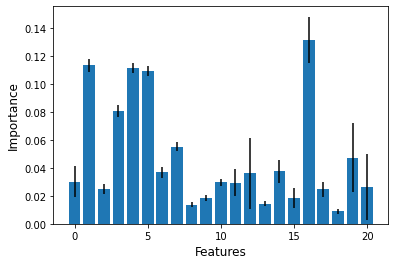

In [ ]:
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=train_df.columns, 
                          columns=["Importance"])
 
importance["Std"] = np.std([tree.feature_importances_ 
                            for tree in rfc.estimators_], axis=0)
 
x = range(importance.shape[0])
y = importance.iloc[:, 0]
yerr = importance.iloc[:, 1]
lables = list(train_df.columns.values)
 
 
 
ax = plt.bar(x, y, yerr=yerr ,align="center")
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Importance', fontsize = 12)
 
#plt.show()

#**XG BOOST**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
gamma = [0.1,0.2]

parameter_grid = {'max_depth': [2,5,10], 'n_estimators':[10,30,100] , 'gamma':gamma}

print(parameter_grid.keys())

##grid search for best parameters
xgb_grid = GridSearchCV(estimator= xgb, param_grid = parameter_grid, cv=3, n_jobs= 4)
xgb_grid.fit(np.array(X_train),np.squeeze(y_train))

print('Best parameters:')
print(xgb_grid.best_params_)
print('Best score' + ":" + str(xgb_grid.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(y_val), xgb_grid.predict(np.array(X_val))
print(classification_report(y_true, y_pred))

dict_keys(['max_depth', 'n_estimators', 'gamma'])
Best parameters:
{'gamma': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best score:0.7786756453423119
Test classification report:
                         precision    recall  f1-score   support

             functional       0.76      0.92      0.83      4846
functional needs repair       0.64      0.19      0.29       647
         non functional       0.84      0.71      0.77      3417

               accuracy                           0.78      8910
              macro avg       0.75      0.60      0.63      8910
           weighted avg       0.78      0.78      0.77      8910



In [ ]:
xgb.fit(X_train,y_train)
print(xgb.feature_importances_)

[0.04404541 0.01939399 0.02962889 0.01874967 0.02697796 0.00265439
 0.02018407 0.02850324 0.02684192 0.01053763 0.02774828 0.02041359
 0.17873713 0.01558665 0.04997176 0.00936363 0.24607578 0.04629357
 0.04951088 0.12878157 0.        ]


##**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [ ]:
criterion= ['gini', 'entropy']

max_depth= [2,5,10]
                            
parameter_grid = {'criterion': criterion, 'max_depth': max_depth}

##grid search for best parameters
DTC_grid = GridSearchCV(estimator= DTC, param_grid = parameter_grid, cv=3, n_jobs= 4)
DTC_grid.fit(np.array(X_train),np.squeeze(y_train))

print('Best parameters:')
print(DTC_grid.best_params_)
print('Best score' + ":" + str(DTC_grid.best_score_))

print('Test classification report:')
y_true, y_pred = np.squeeze(y_val), DTC_grid.predict(np.array(X_val))
print(classification_report(y_true, y_pred))

Best parameters:
{'criterion': 'gini', 'max_depth': 10}
Best score:0.7412457912457913
Test classification report:
                         precision    recall  f1-score   support

             functional       0.71      0.92      0.80      4846
functional needs repair       0.51      0.09      0.15       647
         non functional       0.82      0.60      0.70      3417

               accuracy                           0.74      8910
              macro avg       0.68      0.54      0.55      8910
           weighted avg       0.74      0.74      0.71      8910



In [ ]:
DTC.fit(X_train,y_train)
print(DTC.feature_importances_)

[0.03060849 0.12008246 0.02055639 0.09115128 0.11457352 0.11887739
 0.03267686 0.05405843 0.01224645 0.0150088  0.02743592 0.02320643
 0.03353209 0.01096332 0.02691063 0.01022211 0.15699948 0.01988302
 0.00684156 0.0648127  0.00935269]


## Part 7 

####**final labels**

The best accuracy is achieved by using RANDOM FOREST CLASSIFIER so the prediction on test data is done using rfc.

In [ ]:
y_pred = rfc.predict(test)
print(y_pred)

['non functional' 'non functional' 'functional' ... 'non functional'
 'functional' 'functional']


In [ ]:
df = pd.DataFrame(y_pred)
df.to_csv('final_test.csv')

In [ ]:
df.value_counts()

functional                 9701
non functional             4888
functional needs repair     261
dtype: int64

Result: $65.32$% of the pumps are predicted to be functional, $$32.9% of the pumps are predicted to be non functional and $0.0175$% of the pumps are predicted to be functional but needs repair

###**Part 8**

$References:$

1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

2. https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

3. https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991#:~:text=But%20as%20stated%2C%20a%20random,a%20collection%20of%20decision%20trees.&text=With%20that%20said%2C%20random%20forests,and%20therefore%20yield%20useful%20results.

4. ML for smart monkeys part2 by Amit sethi sir